In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
block_size = 3
X, Y = [], []
for w in words[:5]:
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [8]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([32, 3]), torch.Size([32]), torch.int64, torch.int64)

In [11]:
C = torch.randn((27,2))


In [12]:

C


tensor([[ 0.4756, -0.3940],
        [-0.7419,  0.1883],
        [-0.5215,  0.7288],
        [-0.0081,  1.5513],
        [-0.8815, -0.0084],
        [-0.3939,  0.9281],
        [ 0.1332, -1.1349],
        [ 1.0345,  2.0909],
        [ 0.8799,  0.9169],
        [ 1.2945, -0.2788],
        [-0.5946,  0.1526],
        [ 0.5923,  0.5110],
        [ 0.8789, -0.9940],
        [ 1.3235, -1.7887],
        [ 0.3875, -0.9638],
        [ 1.6351, -0.1389],
        [-1.0714, -0.6778],
        [-0.0609,  1.1137],
        [-0.0536, -0.5207],
        [-0.2340,  1.1658],
        [-1.5964,  1.1229],
        [ 1.0538, -2.5172],
        [-1.1859, -1.5376],
        [-2.3895,  0.7531],
        [-0.2175,  1.6034],
        [ 0.7145,  0.5077],
        [ 0.6174,  0.2081]])

In [13]:

# Create embedding matrix
emb = C[X]
emb.shape, emb

(torch.Size([32, 3, 2]),
 tensor([[[ 0.4756, -0.3940],
          [ 0.4756, -0.3940],
          [ 0.4756, -0.3940]],
 
         [[ 0.4756, -0.3940],
          [ 0.4756, -0.3940],
          [-0.3939,  0.9281]],
 
         [[ 0.4756, -0.3940],
          [-0.3939,  0.9281],
          [ 1.3235, -1.7887]],
 
         [[-0.3939,  0.9281],
          [ 1.3235, -1.7887],
          [ 1.3235, -1.7887]],
 
         [[ 1.3235, -1.7887],
          [ 1.3235, -1.7887],
          [-0.7419,  0.1883]],
 
         [[ 0.4756, -0.3940],
          [ 0.4756, -0.3940],
          [ 0.4756, -0.3940]],
 
         [[ 0.4756, -0.3940],
          [ 0.4756, -0.3940],
          [ 1.6351, -0.1389]],
 
         [[ 0.4756, -0.3940],
          [ 1.6351, -0.1389],
          [ 0.8789, -0.9940]],
 
         [[ 1.6351, -0.1389],
          [ 0.8789, -0.9940],
          [ 1.2945, -0.2788]],
 
         [[ 0.8789, -0.9940],
          [ 1.2945, -0.2788],
          [-1.1859, -1.5376]],
 
         [[ 1.2945, -0.2788],
          [-1.1

In [14]:
X[13], C[X][13]

(tensor([0, 0, 1]),
 tensor([[ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.7419,  0.1883]]))

In [15]:
#Randomly initialized weights and biases
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W1, b1

(tensor([[-3.2797e-01, -3.5543e-01, -4.6509e-01, -9.0943e-01, -1.2576e-01,
          -6.8503e-01,  6.9996e-01, -5.7894e-01,  1.2418e+00,  9.8436e-02,
          -3.6165e-03, -1.6087e-01, -1.3161e+00,  7.0740e-01, -7.4133e-01,
           7.5527e-01, -2.6832e-01, -2.6021e+00,  9.3986e-01, -4.6490e-01,
          -1.0489e+00,  8.1616e-02,  2.0445e+00,  2.5234e-01,  5.9437e-02,
          -7.0870e-01,  1.3119e-01, -1.8510e-01,  8.9679e-01, -3.9381e-01,
          -7.2705e-01, -9.3737e-01,  3.3631e-01, -5.8846e-01,  1.4209e+00,
           8.4359e-01,  3.3022e-01, -1.8439e+00, -7.3601e-01, -1.5464e-01,
          -1.4159e+00,  9.8551e-01, -2.3531e+00, -1.6890e+00,  2.3514e-01,
           9.0830e-01, -1.5163e-02, -8.4474e-01,  3.3221e-01, -7.2294e-01,
           1.0987e+00, -2.8724e-01,  9.2515e-02, -8.8334e-01,  8.8911e-01,
          -3.6068e-01,  1.7627e+00,  3.5972e-01, -9.6293e-01,  6.5175e-02,
          -1.0889e+00, -2.2842e-01, -4.2623e-01, -1.1222e-01, -3.5640e-01,
           3.1591e-01,  1

In [16]:
W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [17]:
# 3 Input nueron example
emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]

(tensor([[ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.3939,  0.9281],
         [ 1.3235, -1.7887],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 1.6351, -0.1389],
         [ 0.8789, -0.9940],
         [ 1.2945, -0.2788],
         [-1.1859, -1.5376],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.7419,  0.1883],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 1.2945, -0.2788],
         [-0.2340,  1.1658],
         [-0.7419,  0.1883],
         [-0.5215,  0.7288],
         [-0.3939,  0.9281],
         [ 0.8789, -0.9940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.2340,  1.1658],
         [ 1.6351, -0.1389],
         [-1.0714, -0.6778],
         [ 0.8799,  0.9169]]),
 tensor([[ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0

In [18]:
# Concatinating the second dimension of each to match Weight Matrix W1's dimensions
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.3939,  0.9281],
        [ 0.4756, -0.3940, -0.3939,  0.9281,  1.3235, -1.7887],
        [-0.3939,  0.9281,  1.3235, -1.7887,  1.3235, -1.7887],
        [ 1.3235, -1.7887,  1.3235, -1.7887, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  1.6351, -0.1389],
        [ 0.4756, -0.3940,  1.6351, -0.1389,  0.8789, -0.9940],
        [ 1.6351, -0.1389,  0.8789, -0.9940,  1.2945, -0.2788],
        [ 0.8789, -0.9940,  1.2945, -0.2788, -1.1859, -1.5376],
        [ 1.2945, -0.2788, -1.1859, -1.5376,  1.2945, -0.2788],
        [-1.1859, -1.5376,  1.2945, -0.2788, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.7419,  0.1883],
        [ 0.4756, -0.3940, -0.7419,  0.1883, -1.1859, -1.5376],
        [-0.7419,  0.1883, -1.1859, -1.5

In [19]:
# Example of torch.unbind
torch.unbind(emb, 1)

(tensor([[ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.3939,  0.9281],
         [ 1.3235, -1.7887],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 1.6351, -0.1389],
         [ 0.8789, -0.9940],
         [ 1.2945, -0.2788],
         [-1.1859, -1.5376],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.7419,  0.1883],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 1.2945, -0.2788],
         [-0.2340,  1.1658],
         [-0.7419,  0.1883],
         [-0.5215,  0.7288],
         [-0.3939,  0.9281],
         [ 0.8789, -0.9940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0.2340,  1.1658],
         [ 1.6351, -0.1389],
         [-1.0714, -0.6778],
         [ 0.8799,  0.9169]]),
 tensor([[ 0.4756, -0.3940],
         [ 0.4756, -0.3940],
         [-0

In [20]:
# Using cat and unvind together to avoid hardcoding dimensions and match emb and W1's dimensions
torch.cat(torch.unbind(emb , 1), 1)
# Output is same as torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) but neurons and dimensions are not hard-coded, therefore is better for variable block_size

tensor([[ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.3939,  0.9281],
        [ 0.4756, -0.3940, -0.3939,  0.9281,  1.3235, -1.7887],
        [-0.3939,  0.9281,  1.3235, -1.7887,  1.3235, -1.7887],
        [ 1.3235, -1.7887,  1.3235, -1.7887, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  1.6351, -0.1389],
        [ 0.4756, -0.3940,  1.6351, -0.1389,  0.8789, -0.9940],
        [ 1.6351, -0.1389,  0.8789, -0.9940,  1.2945, -0.2788],
        [ 0.8789, -0.9940,  1.2945, -0.2788, -1.1859, -1.5376],
        [ 1.2945, -0.2788, -1.1859, -1.5376,  1.2945, -0.2788],
        [-1.1859, -1.5376,  1.2945, -0.2788, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.7419,  0.1883],
        [ 0.4756, -0.3940, -0.7419,  0.1883, -1.1859, -1.5376],
        [-0.7419,  0.1883, -1.1859, -1.5

In [21]:
# Efficient way is to use torch.view instead of cat and/or unbind
emb.view(emb.shape[0], 6)
# Output is same as torch.cat(torch.unbind(emb , 1), 1) but is much more efficient than cat as .view() manipulates 'storage' component of neurons instead of creating new neurons

tensor([[ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.3939,  0.9281],
        [ 0.4756, -0.3940, -0.3939,  0.9281,  1.3235, -1.7887],
        [-0.3939,  0.9281,  1.3235, -1.7887,  1.3235, -1.7887],
        [ 1.3235, -1.7887,  1.3235, -1.7887, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  1.6351, -0.1389],
        [ 0.4756, -0.3940,  1.6351, -0.1389,  0.8789, -0.9940],
        [ 1.6351, -0.1389,  0.8789, -0.9940,  1.2945, -0.2788],
        [ 0.8789, -0.9940,  1.2945, -0.2788, -1.1859, -1.5376],
        [ 1.2945, -0.2788, -1.1859, -1.5376,  1.2945, -0.2788],
        [-1.1859, -1.5376,  1.2945, -0.2788, -0.7419,  0.1883],
        [ 0.4756, -0.3940,  0.4756, -0.3940,  0.4756, -0.3940],
        [ 0.4756, -0.3940,  0.4756, -0.3940, -0.7419,  0.1883],
        [ 0.4756, -0.3940, -0.7419,  0.1883, -1.1859, -1.5376],
        [-0.7419,  0.1883, -1.1859, -1.5

In [22]:
# Creating second layer (hidden layer of activations) of NN 
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h, h.shape
# Keep in mind broadcasting rules for b1. Not to worry in this case

(tensor([[-0.5592, -0.3507, -0.9585,  ..., -0.8146,  0.7780, -0.3535],
         [-0.9453, -0.4112, -0.8353,  ..., -0.6532,  0.6660,  0.0966],
         [ 0.6622, -0.0886,  0.9465,  ..., -0.9959,  0.8645,  0.8391],
         ...,
         [-0.7496, -0.0397, -0.2454,  ...,  0.7363,  0.9237,  0.9997],
         [-0.4328,  0.8810,  0.9157,  ..., -0.9987,  0.5798,  0.6798],
         [-0.9887, -0.8483, -0.9858,  ...,  0.4361,  0.8441, -0.0672]]),
 torch.Size([32, 100]))

In [23]:
#Creating second layer with 27 possible outcome
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [24]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [25]:
# Adding fake counts for 0 value parameters by exponentiating the parameters
counts = logits.exp()
counts

tensor([[1.1364e-01, 3.1368e+05, 3.6535e-04, 2.9985e-06, 3.1051e+06, 3.0397e-07,
         9.8590e+03, 1.1941e+04, 7.4955e-02, 1.5319e+00, 2.8453e-01, 1.5107e-03,
         3.0677e+01, 1.0368e+02, 5.2450e+01, 4.5976e-07, 2.2133e-03, 3.3350e+01,
         4.4377e-01, 3.6069e+02, 1.0358e+01, 7.2047e-02, 6.6995e+05, 1.5110e-01,
         2.9243e+00, 2.5552e+01, 2.8868e+02],
        [2.7488e-04, 4.8309e+04, 7.7840e-05, 5.3463e-01, 3.3888e+09, 7.6437e-06,
         8.2899e+05, 1.7309e+04, 2.4990e+03, 2.8095e-02, 7.3970e-02, 4.2001e+02,
         1.9919e-05, 3.2363e+00, 1.4260e+06, 3.2285e+01, 5.2440e+00, 2.9992e+01,
         7.7549e-06, 1.4242e-01, 2.1698e-04, 3.2167e-03, 1.0707e+08, 1.0112e-03,
         8.6364e+00, 1.7141e+05, 1.0804e+01],
        [1.2587e-03, 2.7950e+03, 2.9539e-03, 2.5597e-07, 1.0502e+00, 6.1850e-06,
         7.6180e-03, 1.0890e+01, 1.1989e+02, 2.3347e+00, 1.2688e-02, 2.6999e-08,
         7.1263e+04, 1.7382e+04, 3.0055e-05, 1.7555e-11, 2.7833e-03, 6.1159e-05,
         1.7664e+

In [26]:
# Normalising counts by creating probability matrix
prob = counts / counts.sum(1, keepdims=True)

In [27]:
prob.shape, prob[0].sum()

(torch.Size([32, 27]), tensor(1.0000))

In [28]:
# Calculating loss manually i.e Negative Log Likelihood
loss = -prob[torch.arange(32), Y].log().mean()

In [29]:
loss

tensor(19.0467)

In [30]:
# Pytorch introduces a much more efficient and readable way to calculate this same loss using "Cross Entropy"
loss = F.cross_entropy(logits, Y)
loss

tensor(19.0467)

In [31]:
# -------- Arranging everything for readability ------------

In [32]:
# Dataset
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [33]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [34]:
sum(p.nelement() for p in parameters) # total number of parameters

3481

In [35]:
emb = C[X] # Embeddings (32, 3, 2)
# First layer will be 3 input embeddings
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
logits = h @ W2 + b2 # Third Layer (32, 27)
counts = logits.exp() # Fake Counts to prevent inf nll
prob = counts / counts.sum(1, keepdims=True) # Probability matrix/ normalised counts
loss = -prob[torch.arange(32), Y].log().mean() # Negative Log likelihood loss
loss

tensor(17.7697)

In [36]:
# Calculating loss efficiently using pytorch
loss = F.cross_entropy(logits, Y) # We will use this as it is efficient and is better for backpropogation as well
loss

tensor(17.7697)

In [37]:
for p in parameters:
    p.requires_grad = True

In [38]:
for _ in range(100):
    # FORWARD PASS
    emb = C[X] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656402587890625
11.298771858215332
9.452458381652832
7.984263896942139
6.891322135925293
6.100015163421631
5.4520368576049805
4.898152828216553
4.414664268493652
3.9858498573303223
3.6028313636779785
3.2621419429779053
2.961381435394287
2.6982975006103516
2.469712495803833
2.271660804748535
2.1012837886810303
1.9571770429611206
1.837485671043396
1.7380964756011963
1.6535117626190186
1.5790902376174927
1.5117673873901367
1.4496052265167236
1.391312599182129
1.3359929323196411
1.2830536365509033
1.232191801071167
1.1833819150924683
1.1367989778518677
1.0926649570465088
1.0510928630828857
1.012027382850647
0.9752706289291382
0.9405570030212402
0.9076128602027893
0.8761926293373108
0.8460893630981445
0.8171359300613403
0.7891993522644043
0.7621751427650452
0.7359815835952759
0.710558295249939
0.6858614087104797
0.6618655323982239
0.6385658383369446
0.6159822344779968
0.594166100025177
0.573210597038269
0.5532565712928772
0.5344884991645813
0.5171172618865967
0.50133162

In [39]:
block_size = 3
X, Y = [], []
for w in words: # use all words instead of first 5
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [40]:
# The loss is so less because we are overfitting the data. That is, we are feeding just 32 inputs to 3481 parameters
# For efficiency we will create batches of data of size 32 like this
torch.randint(0, X.shape[0], (32,))

tensor([118870, 127031,  93201, 170018, 188999, 134252,  27572, 172336,  44152,
        102942, 148539, 190328, 127263,  17338, 162082, 130846,  48289,  24505,
        196937, 192177,  30504, 127361, 102358, 224721,  34597, 167764,  74271,
        152697, 116757,  93663, 134670, 164629])

In [41]:
#Using batches
for _ in range(100):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad
# This will be much faster than training the model on all 32000+ words
# Even tho the quality of gradient is not that much reliable, it is pretty good if we keep speed in mind

13.220212936401367
10.286127090454102
11.263700485229492
9.94861888885498
11.520246505737305
10.780299186706543
12.088987350463867
7.605779647827148
8.921299934387207
9.524087905883789
7.811470031738281
7.851970195770264
7.611056804656982
7.94785213470459
6.646154403686523
8.892738342285156
6.549430847167969
7.575181007385254
9.412649154663086
7.464071750640869
7.634772300720215
5.671983242034912
6.227531909942627
8.741568565368652
6.483071327209473
5.547240257263184
6.546412467956543
7.388932228088379
6.315805912017822
6.766354560852051
6.84752893447876
5.9012250900268555
6.316662788391113
6.987812042236328
6.327276229858398
5.941542148590088
5.604893684387207
6.545633316040039
5.075256824493408
5.320635795593262
5.315642833709717
5.6630401611328125
6.425763130187988
4.821839809417725
6.908283710479736
6.397665023803711
5.347985744476318
5.3991780281066895
6.289910793304443
4.478941917419434
5.82509183883667
4.993302345275879
4.227697849273682
5.643302917480469
4.643705368041992
4.429

In [42]:
# How determine a good learning rate?
# Create an matrix (linear space) of 1000 numbers (1000 possible learning rates) between 0.001 (When loss decreases but at a slow pace) and 1 (When loss starts to burst)
lre = torch.linspace(-3, 0, 1000) # Learning rate exponent 
lrs = 10**lre # 10**-3 will be 0.001 and 10**0 will be 1
lrs # Exponentially spaced

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [43]:
# Reinitialisation for calculating lr
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

lri = [] # To track lrs used
lossi = [] # To track losses that lr produced
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = lrs[i] # Changing lr with every iteration # Starting with very low 0.001 then going upto 1
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    lri.append(lre[i])
    lossi.append(loss.item())

20.30213165283203
18.673641204833984
22.73077392578125
21.00111961364746
16.62641716003418
20.628875732421875
19.291969299316406
19.339317321777344
20.932674407958984
18.330856323242188
18.119050979614258
18.35382843017578
16.21590232849121
16.619884490966797
15.847201347351074
17.095516204833984
18.46965980529785
19.278240203857422
18.69189453125
17.619049072265625
18.239259719848633
19.752573013305664
17.88521957397461
17.25743293762207
19.398780822753906
18.038116455078125
20.139598846435547
17.72576332092285
18.413114547729492
17.541519165039062
18.42474937438965
19.875473022460938
17.03681182861328
17.29562759399414
18.79566764831543
17.408063888549805
20.236522674560547
17.660917282104492
19.24613380432129
19.34818458557129
16.523948669433594
16.74704933166504
14.781545639038086
16.286291122436523
17.47810935974121
17.637880325317383
18.522411346435547
18.24026870727539
18.881486892700195
17.157838821411133
16.01334571838379
17.144927978515625
15.8167142868042
20.008569717407227


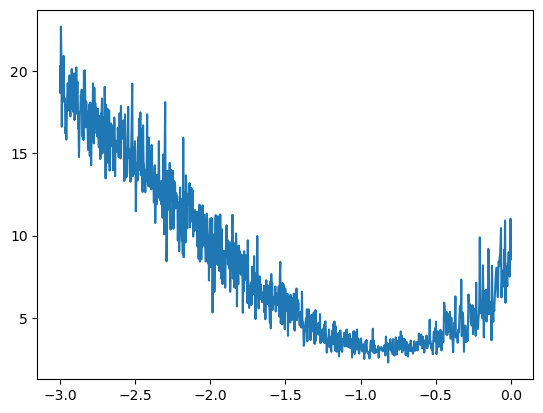

In [44]:
# Plot lri, lossi for visualisation
plt.plot(lri, lossi)
# The output shows that somewhere around -1.0 and -0.5 the loss is least.
# So we will use lr as 0.1

In [45]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.659343957901001


In [46]:
# Learning rate decay - At later stages of training, we lower the learning rate to minimise gradient movement and keep on training the model
# For example - We run the model for first 20000 epochs at lr = 0.1 then set lr = 0.01 for next 10000 epochs
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01 # Decayed lr
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.590111255645752


In [47]:
"""
When nueral net size is big, that is when there are a lot of params and the training data is less, the model learns to
underfit. 
This means that the model will learn to memorise the data in training data and what output it should produce.
Therefore the loss on training data will be much less but on test data will be much higher, therefore a bad model.

To solve this, we split the training data into 3 parts, namely: 
- Training Split(Around 80%, used to train the model params), 
- Dev/Validation Split (Around 10%, used to train the hyperparameters), 
- Test Split(Around 10%, used to evaluate the performance of model. Used only when model is trained so that model doesn't overfit on test data
as well).
"""
# Building dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [48]:
len(words), n1, n2, n2-n1, len(words)-n2

(32033, 25626, 28829, 3203, 3204)

In [49]:
#Training on Xtr, Ytr and validating/evaluating on Xdev, Ydev below

In [50]:
# Training
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # FORWARD PASS
    emb = C[Xtr[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.6817538738250732


In [51]:
# Evaluation
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4035, grad_fn=<NllLossBackward0>)

In [52]:
# Decaying lr and training lesser epochs
for i in range(10000): # Lesser Epochs
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # FORWARD PASS
    emb = C[Xtr[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01 # Decayed lr
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.512403726577759


In [53]:
# Evaluation
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3322, grad_fn=<NllLossBackward0>)

In [54]:
# Evaluating on testing set
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

# Loss on Training set and Validation set is almost same that means model is not overfitting, and is not memorising data

tensor(2.3328, grad_fn=<NllLossBackward0>)

In [55]:
# Increasing param size
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]


In [56]:
sum(p.nelement() for p in parameters)

10281

In [57]:
for p in parameters:
    p.requires_grad = True

In [58]:
# First training with lr = 0.1 then ls = 0.05 then lr = 0.01. Training multiple times.
lri = [] # To track lrs used
lossi = [] # To track losses that lr produced
stepi = [] # To track steps
for i in range(30000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.05 # Changing lr with every iteration # Starting with very low 0.001 then going upto 1
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

23.79477310180664
29.488615036010742
23.003015518188477
25.02092933654785
21.563570022583008
19.16619110107422
21.002748489379883
22.968294143676758
16.250764846801758
24.473047256469727
18.484115600585938
15.832698822021484
18.33094024658203
19.140920639038086
16.920385360717773
16.2821044921875
16.41086196899414
13.41789436340332
13.694596290588379
12.7166748046875
21.45796775817871
16.156902313232422
11.124429702758789
16.405519485473633
14.11895751953125
14.802359580993652
8.91327953338623
12.665745735168457
11.782761573791504
14.380072593688965
8.393208503723145
8.313018798828125
12.093515396118164
13.507938385009766
11.685564041137695
7.597371578216553
12.432276725769043
13.4433012008667
10.130303382873535
6.8449296951293945
9.238365173339844
11.588114738464355
7.746718406677246
9.466950416564941
11.641451835632324
9.025333404541016
9.201738357543945
9.335270881652832
8.101520538330078
8.67137336730957
8.776322364807129
9.071982383728027
6.497389793395996
5.017629623413086
9.9963

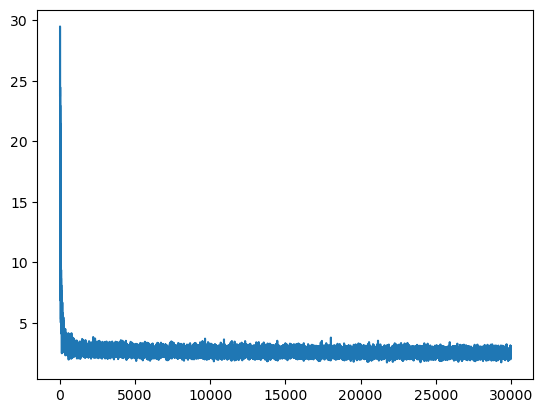

In [59]:
plt.plot(stepi, lossi)

In [60]:
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.6038, grad_fn=<NllLossBackward0>)

In [61]:
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss
# Improved loss on training and test dataset

tensor(2.6076, grad_fn=<NllLossBackward0>)

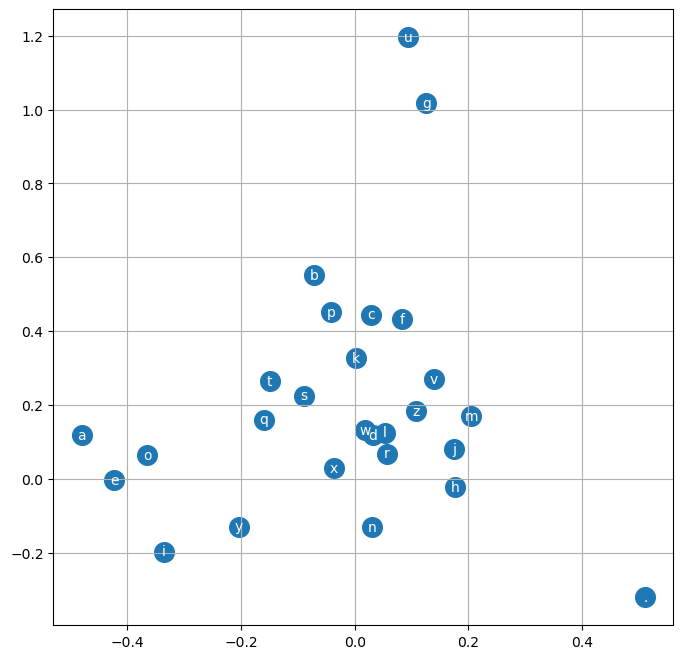

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [ ]:
# Now we are open to change different parameters and hyperparameters and magic numbers to improve model performance and red